# Libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Dataset

## Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3670 images belonging to 5 classes.


In [5]:
# target_size 150, 150 or 256, 256

## Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 3670 images belonging to 5 classes.


In [7]:
# target size 150,150 or 256, 256 (same training set)

# Building a Convolutional Neural Network (CNN)

In [8]:
cnn = tf.keras.models.Sequential()

## Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [10]:
# 64,64 because we used earlier in processing in test and train dataset
# has to match
# for black images change the last digit 3 into 1
# kerner_size = 3 or 5 or 7

## Pooling

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Second Convolutional Layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

## Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [15]:
# hidden neuron = 128

## Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Training  CNN

## Compiling the CNN

In [25]:
cnn.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

## Training the CNN on the Training set and evaluating it on the Test set

In [27]:
cnn.fit(x = training_set, validation_data = test_set, epochs=25)

Epoch 1/25
115/115 [==============================] - ETA: 0s - loss: 1.1691 - accuracy: 0.5166

C:\Users\jakar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


115/115 [==============================] - 49s 433ms/step - loss: 1.1691 - accuracy: 0.5166 - val_loss: 1.0349 - val_accuracy: 0.5959
Epoch 2/25
115/115 [==============================] - 27s 235ms/step - loss: 1.0390 - accuracy: 0.5926 - val_loss: 0.9665 - val_accuracy: 0.6302
Epoch 3/25
115/115 [==============================] - 28s 247ms/step - loss: 0.9407 - accuracy: 0.6297 - val_loss: 0.9111 - val_accuracy: 0.6608
Epoch 4/25
115/115 [==============================] - 27s 236ms/step - loss: 0.8892 - accuracy: 0.6657 - val_loss: 0.7944 - val_accuracy: 0.7035
Epoch 5/25
115/115 [==============================] - 27s 235ms/step - loss: 0.7981 - accuracy: 0.6937 - val_loss: 0.7386 - val_accuracy: 0.7193
Epoch 6/25
115/115 [==============================] - 27s 236ms/step - loss: 0.7630 - accuracy: 0.7101 - val_loss: 0.9721 - val_accuracy: 0.6499
Epoch 7/25
115/115 [==============================] - 27s 234ms/step - loss: 0.7598 - accuracy: 0.7065 - val_loss: 0.7711 - val_accuracy: 0.7

# Prediction

In [79]:
test_image = image.load_img('dataset/single_prediction/537207677_f96a0507bb.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] > 0.5:
    prediction = 'daisy'
elif result[0][1] > 0.5:
    prediction='dandelion'
elif result[0][2] > 0.5:
    prediction='rose'
elif result[0][3] > 0.5:
    prediction='sun flower'
else:
    prediction='tulips'
    
print(prediction)

rose


In [76]:
result[0][3]

1.0

In [32]:
# train and set er sime same same hote hbe 64, 64
# result first 0 means batch
# scond 0 pic er index

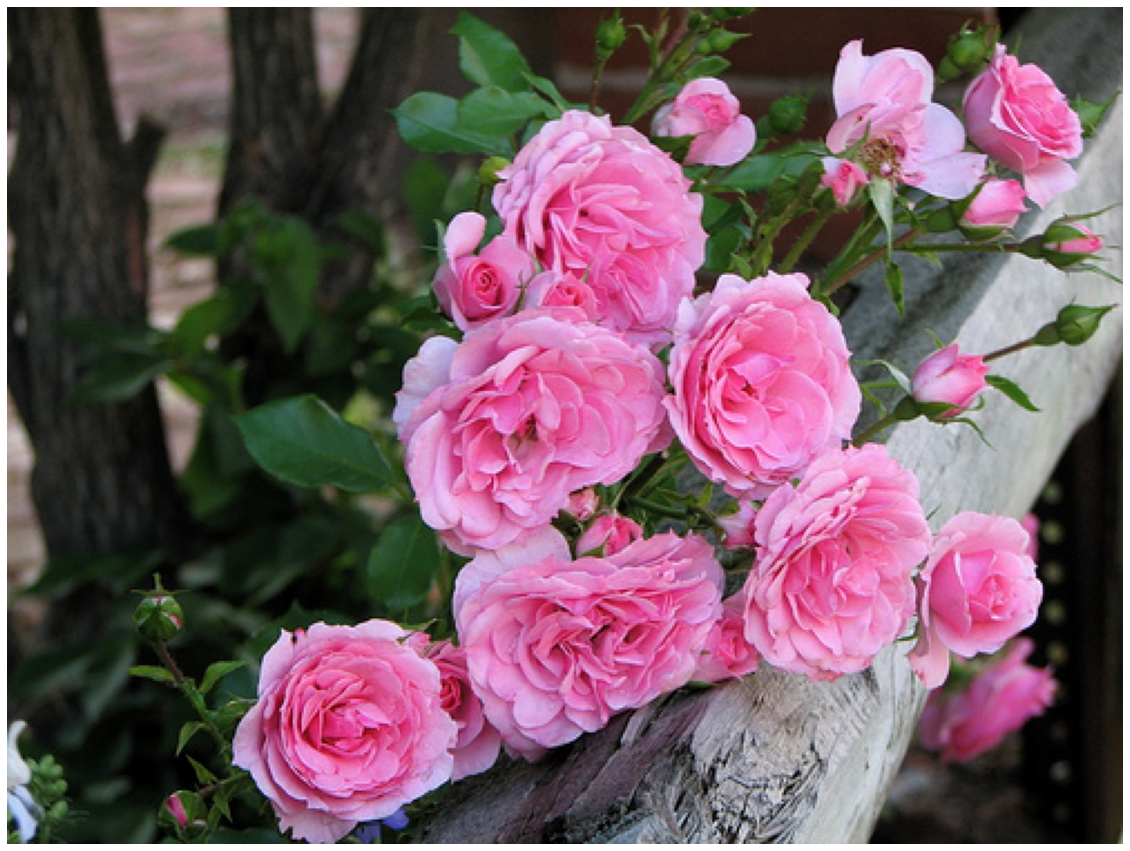

In [78]:
img=mpimg.imread('dataset/single_prediction/537207677_f96a0507bb.jpg')
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img)